# 0.0 Imports

In [1]:
import warnings

import pandas                  as pd
import numpy                   as np
import os

from matplotlib import pyplot  as plt
from sklearn    import metrics as mt
from sklearn.neighbors import KNeighborsClassifier as KNN

In [2]:
warnings.filterwarnings("ignore")

# 1.0 Load Datasets

In [3]:
# executando o arquivo Metrics_functions
get_ipython().run_line_magic('run', 'Metrics_functions.ipynb')

In [7]:
# carregando os dados
x_train, y_train, x_val, y_val, x_test, y_test = load_data('classificacao')

# 2.0 Training model 

In [8]:
# treinamento
knn_class = KNN()
knn_class.fit(x_train,y_train)

# classificação
y_pred = knn_class.predict(x_train)

# metricas de permormance
metrics(y_train, y_pred, 'Treinamento')

# guardando resultado
acc_train, precision_train, recall_train, f1_score_train = save_metrics(y_train, y_pred)

Metricas de Treinamento: 
Accuracy:  0.782
Precision: 0.756
Recall:    0.733
F1 Score:  0.744


## 2.1 Performance on Validation Data

In [9]:
# treinamento
knn_class = KNN()
knn_class.fit(x_train,y_train)

# predict
y_pred_val = knn_class.predict(x_val)

#performance
metrics(y_val, y_pred_val, 'Validação')

#guardando resultados
acc_val, precision_val, recall_val, f1_score_val = save_metrics(y_val, y_pred_val)

Metricas de Validação: 
Accuracy:  0.676
Precision: 0.632
Recall:    0.603
F1 Score:  0.617


## 2.2 Finding The Best Parameter

### Parameter
* K

In [10]:
# lista de valores para encontrar o melhor parametro
values = np.arange(3, 21, 2)

accuracy_list  = []
precision_list = []
recall_list    = []
f1_score_list  = []

In [11]:
for i in values:
    # treinamento
    knn_class = KNN(n_neighbors = i)
    knn_class.fit(x_train, y_train)

    # predict
    y_pred_val = knn_class.predict(x_val)
    
    #performance 
    a, p, r, f = save_metrics(y_val, y_pred_val)

    # guardar resultados
    accuracy_list.append(a)
    precision_list.append(p)
    recall_list.append(r)
    f1_score_list.append(f)

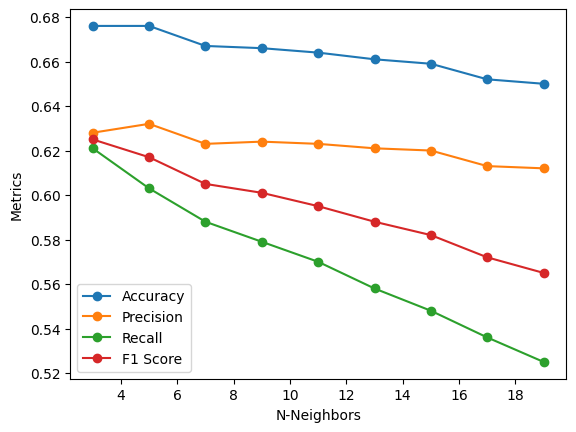

In [12]:
# visualização das metricas
plt.plot(values, accuracy_list, marker= 'o', label='Accuracy')
plt.plot(values, precision_list, marker= 'o', label='Precision')
plt.plot(values, recall_list, marker= 'o', label='Recall')
plt.plot(values, f1_score_list, marker= 'o', label='F1 Score')
plt.xlabel('N-Neighbors')
plt.ylabel('Metrics')
plt.legend()

In [13]:
best_values = values[np.argmax(accuracy_list)]
best_values

3

## 2.3 Performance on Test Data

In [14]:
# treinamento
knn_class = KNN( n_neighbors = best_values)
knn_class.fit(np.concatenate((x_train,x_val)),
             np.concatenate((y_train, y_val)) )

# Predict
y_pred_test = knn_class.predict(x_test)

#performance 
metrics(y_test, y_pred_test, 'Teste')

# guardar metricas de performance
acc_test, precision_test, recall_test, f1_score_test = save_metrics(y_test, y_pred_test)

Metricas de Teste: 
Accuracy:  0.688
Precision: 0.648
Recall:    0.635
F1 Score:  0.642


# 3.0 Save Results

In [15]:
train_metrics = {
    'Algoritmo': 'K-Neighbors',
    'Accuracy' : acc_train,
    'Precision': precision_train,
    'Recall'   : recall_train,
    'F1-Score' : f1_score_train
}
validation_metrics = {
    'Algoritmo': 'K-Neighbors',
    'Accuracy' : acc_val,
    'Precision': precision_val,
    'Recall'   : recall_val,
    'F1-Score' : f1_score_val
}
test_metrics = {
    'Algoritmo': 'K-Neighbors',
    'Accuracy' : acc_test,
    'Precision': precision_test,
    'Recall'   : recall_test,
    'F1-Score' : f1_score_test
}

train = pd.DataFrame([train_metrics])
validation = pd.DataFrame([validation_metrics])
test = pd.DataFrame([test_metrics])

train.to_csv(
    './train_metrics_classificacao.csv',
    mode ='a',
    index=False,
    header=not os.path.exists('./train_metrics_classificacao.csv')
)

validation.to_csv(
    './validation_metrics_classificacao.csv',
    mode ='a',
    index=False,
    header=not os.path.exists('./validation_metrics_classificacao.csv')
)

test.to_csv(
    './test_metrics_classificacao.csv',
    mode ='a',
    index=False,
    header=not os.path.exists('./test_metrics_classificacao.csv')
)